In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('dataset.csv')
df

,review,rating,label3,label4
0,"in my opinion , a movie reviewer's most import...",0.1,0,0
1,"you can watch this movie , that is based on a ...",0.2,0,0
2,"this is asking a lot to believe , and though i...",0.2,0,0
3,no heroes and no story are the main attributes...,0.2,0,0
4,"this is not an art movie , yet i saw it an art...",0.2,0,0
...,...,...,...,...
5001,the conventional wisdom is that movie sequels ...,0.9,2,3
5002,nicolas roeg's mesmerizing 1971 film walkabout...,0.9,2,3
5003,the movie air force one should require a docto...,0.9,2,3
5004,""" well , jones , at least you haven't forgotte...",0.9,2,3


### Analysis by length and occurance

In [2]:
def labels_occurance(df):
    print("Labels3 occurance")
    label3_occ = df['label3'].value_counts().sort_index()
    print(label3_occ)
    print("Labels4 occurance")
    label4_occ = df['label4'].value_counts().sort_index()
    print(label4_occ)

    fig, (ax1, ax2) = plt.subplots(2)
    fig.suptitle("Label occurances")

    ax1.bar(label3_occ.index, label3_occ.values)
    ax2.bar(label4_occ.index, label4_occ.values)
    plt.show()

Labels3 occurance
0    1197
1    1915
2    1894
Name: label3, dtype: int64
Labels4 occurance
0     615
1    1553
2    1998
3     840
Name: label4, dtype: int64


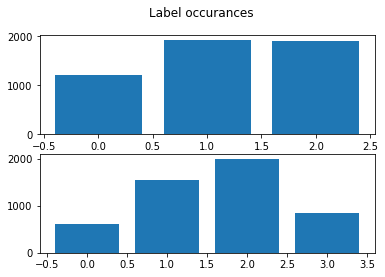

In [3]:
labels_occurance(df)

In [4]:
def length_by_label(df):
    analysed_df = pd.DataFrame({
        'length': df.apply(lambda row: len(row['review']), axis=1),
        'label3': df['label3'],
        'label4': df['label4']
    })
    label3_grouped = analysed_df.groupby('label3').mean()
    label4_grouped = analysed_df.groupby('label4').mean()
    print("Labels3 reviews length")
    print(label3_grouped)
    print("Labels4 reviews length")
    print(label4_grouped)

    fig, (ax1, ax2) = plt.subplots(2)
    fig.suptitle("Average review length by label")

    ax1.bar(label3_grouped.index, label3_grouped['length'])
    ax2.bar(label4_grouped.index, label4_grouped['length'])
    plt.show()

Labels3 reviews length
             length    label4
label3                       
0       2120.915622  0.486216
1       2170.408355  1.492950
2       2429.123548  2.443506
Labels4 reviews length
             length    label3
label4                       
0       2196.643902  0.000000
1       2096.575016  0.625241
2       2271.865365  1.527528
3       2559.195238  2.000000


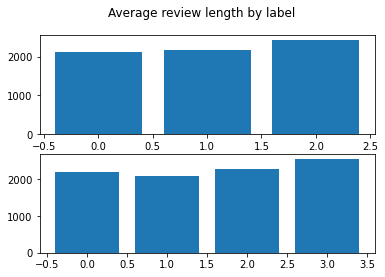

In [5]:
length_by_label(df)

### Analysis using CountVectorizer

- with stop words

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

stop = ["the", "a",  "an", "of", "and", "to", "is", "it", "in", "at", "on", "by",
            "be", "as", "or", "for"]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['review'].values)

In [7]:
def top_words_whole_data(original_df, vectorizer, vectorized_df, n):
    vectorized_df_sum = vectorized_df.sum(axis=0)
    words_freq = [(word, vectorized_df_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    to_plot = words_freq[:n]
    x = []
    y = []
    for word, freq in to_plot:
        x.append(word)
        y.append(freq)

    plt.figure()
    plt.title("Most frequent words in whole dataset")
    plt.bar(x, y)
    plt.xticks(rotation='vertical')
    plt.show()

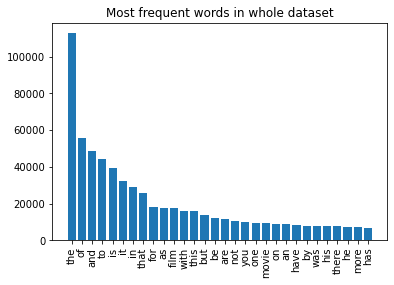

In [8]:
top_words_whole_data(df, vectorizer, X, 30)

In [9]:
def top_words_each_review_label3(original_df, vectorizer, vectorized_df, n):
    analysed_df = pd.DataFrame(vectorized_df.todense(), 
                               columns=vectorizer.get_feature_names())
    analysed_df['label3'] = original_df['label3']
    analysed_df['top_word'] = analysed_df.idxmax(axis=1)

    label3_top_words0 = analysed_df[analysed_df['label3'] == 0]
    label3_top_words1 = analysed_df[analysed_df['label3'] == 1]
    label3_top_words2 = analysed_df[analysed_df['label3'] == 2]

    label3_0 = label3_top_words0['top_word'].value_counts()
    label3_1 = label3_top_words1['top_word'].value_counts()
    label3_2 = label3_top_words2['top_word'].value_counts()
    
    return label3_0, label3_1, label3_2
    
def top_words_each_review_label4(original_df, vectorizer, vectorized_df, n):
    analysed_df = pd.DataFrame(vectorized_df.todense(), 
                               columns=vectorizer.get_feature_names())
    analysed_df['label4'] = original_df['label4']
    analysed_df['top_word'] = analysed_df.idxmax(axis=1)

    label4_top_words0 = analysed_df[analysed_df['label4'] == 0]
    label4_top_words1 = analysed_df[analysed_df['label4'] == 1]
    label4_top_words2 = analysed_df[analysed_df['label4'] == 2]
    label4_top_words3 = analysed_df[analysed_df['label4'] == 3]

    label4_0 = label4_top_words0['top_word'].value_counts()
    label4_1 = label4_top_words1['top_word'].value_counts()
    label4_2 = label4_top_words2['top_word'].value_counts()
    label4_3 = label4_top_words3['top_word'].value_counts()
    
    return label4_0, label4_1, label4_2, label4_3

In [10]:
label3_0, label3_1, label3_2 = top_words_each_review_label3(df, vectorizer, X, 30)

In [11]:
label4_0, label4_1, label4_2, label4_3 = top_words_each_review_label4(df, vectorizer, X, 30)

In [12]:
def plot_label_words(ds, n, title):
    plt.bar(ds.index.tolist()[:n], ds.values.tolist()[:n])
    plt.title("Top words for label "+title)
    plt.xticks(rotation=90)
    plt.show()

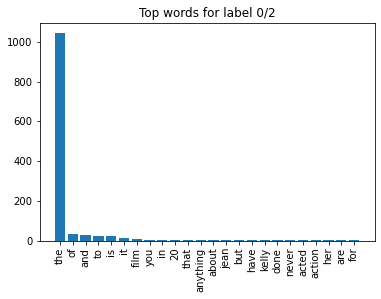

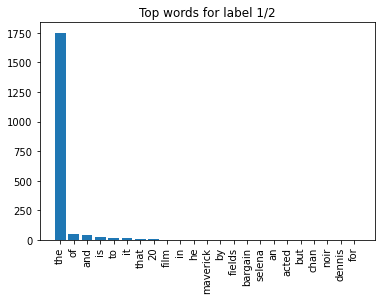

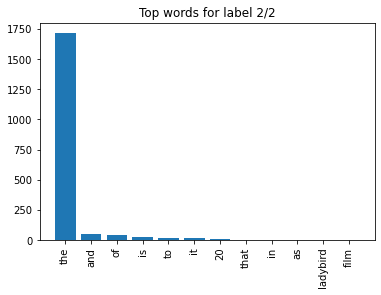

In [13]:
plot_label_words(label3_0, 30, "0/2")
plot_label_words(label3_1, 30, "1/2")
plot_label_words(label3_2, 30, "2/2")

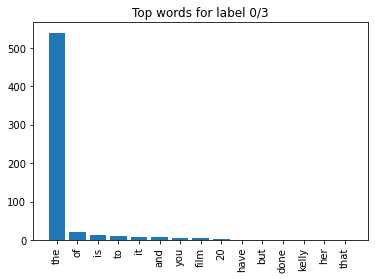

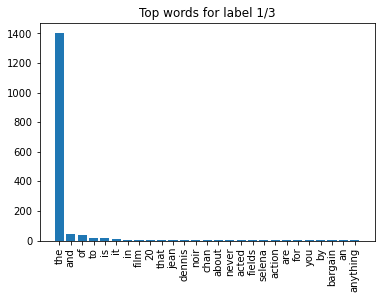

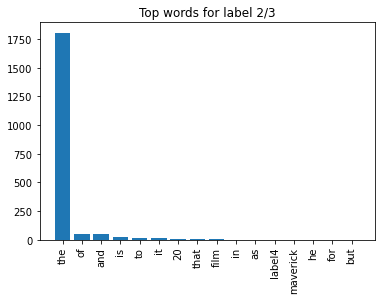

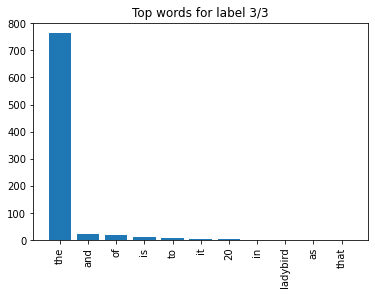

In [14]:
plot_label_words(label4_0, 30, "0/3")
plot_label_words(label4_1, 30, "1/3")
plot_label_words(label4_2, 30, "2/3")
plot_label_words(label4_3, 30, "3/3")